# Classification

In [1]:
#importando a base
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = '../data/customer_clustered.csv'
base_clustered = pd.read_csv(data)
base_clustered.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,Age_Group,Mnt_Total,Mnt_Reg,Children,Has_Children,Accepted_Cmp_Total,Has_Accepted_Cmp,Num_Total_Purchases,Cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,0
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,18-30,53,48,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,2


In [2]:
#Verificando informações
base_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2205 non-null   object 
 1   Marital_Status        2205 non-null   object 
 2   Income                2205 non-null   float64
 3   Kidhome               2205 non-null   int64  
 4   Teenhome              2205 non-null   int64  
 5   Recency               2205 non-null   int64  
 6   MntWines              2205 non-null   int64  
 7   MntFruits             2205 non-null   int64  
 8   MntMeatProducts       2205 non-null   int64  
 9   MntFishProducts       2205 non-null   int64  
 10  MntSweetProducts      2205 non-null   int64  
 11  MntGoldProds          2205 non-null   int64  
 12  NumDealsPurchases     2205 non-null   int64  
 13  NumWebPurchases       2205 non-null   int64  
 14  NumCatalogPurchases   2205 non-null   int64  
 15  NumStorePurchases    

# Separando para treinar o modelo

In [3]:
#Separando X e Y
X= base_clustered.drop('Response',axis=1)
y=base_clustered['Response']

In [4]:
#Organizando as colunas em variaveis. 
one_hot_cols = [
    'Education',
    'Marital_Status',
    'Age_Group',
    'Kidhome',
    'Teenhome',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'Accepted_Cmp_Total',
    'Has_Accepted_Cmp',
    'Complain',
    'Years_Since_Enrolled',
    'Children',
    'Has_Children',
    'Cluster'
]
standart_cols=[
    'Income',
    'Age'
]
power_cols = X.columns[
    X.columns.str.startswith('Mnt') | X.columns.str.startswith('Num')
].tolist()

MinMax_cols=[
    'Days_Since_Enrolled',
    'Recency'
]

## Utilização de bibliotecas
- DummyClassifier: Classificar todos os labels como 1 único parametro 'stratified', respondendo na proporção da classificação. Como estamos tratando de um dataset desbalanceado, se algum modelo tiver uma performace pior que a dele, ele será descartado.
- Já os outro 3 modelos, DecisionTreeClassifier, LogisticRegression, KNeighborsClassifier são modelos mais faceis de explicar e que já tenho maior familiaridade.
#### Considerações epecificas:
- Muitas colunas (35)
- Dataset desbalanceado, logo utilizar o Pipeline do imblearn
- Utilizar o RandomUnderSampler para balancear os dados
- Seleciona as melhores características com base em algum critério de pontuação. 

In [5]:
#Fazendo o preprocessamento e o Pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    PowerTransformer,
)
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate

RANDOM_STATE = 42

skf =  StratifiedKFold(n_splits=5, shuffle=True,random_state=RANDOM_STATE)

preprocessing = ColumnTransformer(
    [
        ('standard', StandardScaler(), standart_cols),
        ('onehot', OneHotEncoder(), one_hot_cols),
        ('power', PowerTransformer(), power_cols),
        ('minmax', MinMaxScaler(), MinMax_cols)
    ]
)
pipeline_logreg =  Pipeline(
    [
        ('preprocessing',preprocessing),
        ('feature_selection',SelectKBest(score_func=f_classif,k=10)),
        ('rus',RandomUnderSampler(random_state=RANDOM_STATE)),
        ('model',LogisticRegression(random_state=RANDOM_STATE))
    ]
)

In [6]:
#Verificando o Pipeline
pipeline_logreg.fit(X,y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Income', 'Age']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status',
                                                   'Age_Group', 'Kidhome',
                                                   'Teenhome', 'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5',
                                                   'Accepted_Cmp_Total',
                                                   'Has_Accepted_Cmp',
                                                   'Complain',
                                                   'Years_Since_Enrolled',...
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'Mnt_Total', 'Mnt_Reg',
                                                   'Num_Total_Purchases']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Days_Since_Enrolled',
                                                   'Recency'])])),
                ('feature_selection', SelectKBest()),
                ('rus', RandomUnderSampler(random_state=42)),
                ('model', LogisticRegression(random_state=42))])

In [7]:
#As 10 principais colunas escolhidas pelo modelo
pipeline_logreg[:-1].get_feature_names_out()

array(['onehot__AcceptedCmp1_0', 'onehot__AcceptedCmp1_1',
       'onehot__AcceptedCmp3_0', 'onehot__AcceptedCmp3_1',
       'onehot__AcceptedCmp5_0', 'onehot__AcceptedCmp5_1',
       'onehot__Accepted_Cmp_Total_0', 'onehot__Accepted_Cmp_Total_3',
       'onehot__Has_Accepted_Cmp_0', 'onehot__Has_Accepted_Cmp_1'],
      dtype=object)

#### Todas as 10 colunas estão relacionadas com campanhas
- Isso não é necessariamente algo bom!

In [8]:
#Colunas e numero de colunas que sariam do pré processamento
print(pipeline_logreg[:-3].get_feature_names_out())
print(len(pipeline_logreg[:-3].get_feature_names_out()))

['standard__Income' 'standard__Age' 'onehot__Education_2n Cycle'
 'onehot__Education_Basic' 'onehot__Education_Graduation'
 'onehot__Education_Master' 'onehot__Education_PhD'
 'onehot__Marital_Status_Partner' 'onehot__Marital_Status_Single'
 'onehot__Age_Group_18-30' 'onehot__Age_Group_31-45'
 'onehot__Age_Group_46-60' 'onehot__Age_Group_61+' 'onehot__Kidhome_0'
 'onehot__Kidhome_1' 'onehot__Kidhome_2' 'onehot__Teenhome_0'
 'onehot__Teenhome_1' 'onehot__Teenhome_2' 'onehot__AcceptedCmp1_0'
 'onehot__AcceptedCmp1_1' 'onehot__AcceptedCmp2_0'
 'onehot__AcceptedCmp2_1' 'onehot__AcceptedCmp3_0'
 'onehot__AcceptedCmp3_1' 'onehot__AcceptedCmp4_0'
 'onehot__AcceptedCmp4_1' 'onehot__AcceptedCmp5_0'
 'onehot__AcceptedCmp5_1' 'onehot__Accepted_Cmp_Total_0'
 'onehot__Accepted_Cmp_Total_1' 'onehot__Accepted_Cmp_Total_2'
 'onehot__Accepted_Cmp_Total_3' 'onehot__Accepted_Cmp_Total_4'
 'onehot__Has_Accepted_Cmp_0' 'onehot__Has_Accepted_Cmp_1'
 'onehot__Complain_0' 'onehot__Complain_1'
 'onehot__Years_

- É possível que a redução para 10 colunas não tenha trago bons resultados

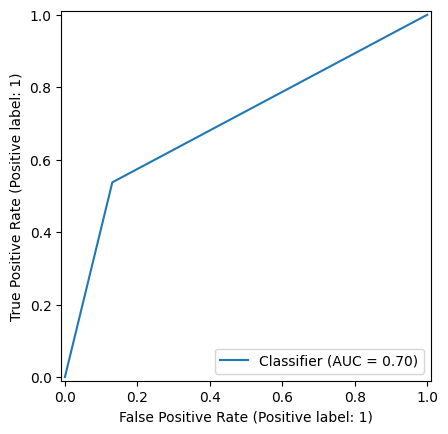

In [9]:
#ROC
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(pipeline_logreg,X,y,cv=skf)
roc=RocCurveDisplay.from_predictions(y,y_pred)

- Ela representa a taxa de verdadeiros positivos em relação à taxa de falsos positivos em vários limiares de decisão. 

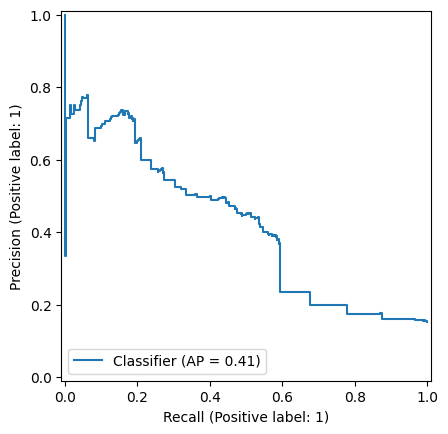

In [10]:
#Precision-Recall
from sklearn.metrics import PrecisionRecallDisplay
y_pred = cross_val_predict(pipeline_logreg,X,y,cv=skf,method='decision_function')
prc=PrecisionRecallDisplay.from_predictions(y,y_pred)

## Ajuste de hiperparametros

In [11]:
pipeline_logreg.named_steps

{'preprocessing': ColumnTransformer(transformers=[('standard', StandardScaler(),
                                  ['Income', 'Age']),
                                 ('onehot', OneHotEncoder(),
                                  ['Education', 'Marital_Status', 'Age_Group',
                                   'Kidhome', 'Teenhome', 'AcceptedCmp1',
                                   'AcceptedCmp2', 'AcceptedCmp3',
                                   'AcceptedCmp4', 'AcceptedCmp5',
                                   'Accepted_Cmp_Total', 'Has_Accepted_Cmp',
                                   'Complain', 'Years_Since_Enrolled',
                                   'Children', 'Has_Children', 'Cluster']),
                                 ('power', PowerTransformer(),
                                  ['MntWines', 'MntFruits', 'MntMeatProducts',
                                   'MntFishProducts', 'MntSweetProducts',
                                   'MntGoldProds', 'NumDealsPurchases',
     

# Escolhas dos hiperparametros com o GridSearchCV
- k: Para aumentar as colunas diferentes de 'campanhas'
- C: utilizar diversos valores
- Solver: seguindo a documentação, lbgsf - padrão, liblinear- para datasets pequenos, saga - para já ter uma noção para pós campanha piloto

In [12]:
import numpy as np
np.logspace(-3,3,7)
from sklearn.model_selection import GridSearchCV
param_grid={
    'feature_selection__k': [10,15,20,25],
    'model__C': np.logspace(-3,3,7),
    'model__solver':['lbgsf','liblinear','saga'],
    'model__penalty':['l2','l1','elasticnet','None']
}
grid_search=GridSearchCV(
    pipeline_logreg,
    param_grid,
    scoring=['roc_auc','average_precision','accuracy'],
    refit='average_precision'
)

In [13]:
grid_search

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('standard',
                                                                         StandardScaler(),
                                                                         ['Income',
                                                                          'Age']),
                                                                        ('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Education',
                                                                          'Marital_Status',
                                                                          'Age_Group',
                                                                          'Kidhome',
                                                                          'Teenhome',
                                                                          'AcceptedCmp1',
                                                                          'AcceptedCmp2',
                                                                          'AcceptedCmp3',
                                                                          'AcceptedCmp4',
                                                                          'AcceptedCmp5',
                                                                          'Accepted_Cmp_Total',
                                                                          'Has_Accepted_Cmp',
                                                                          'Complain',...
                                        RandomUnderSampler(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             param_grid={'feature_selection__k': [10, 15, 20, 25],
                         'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'model__penalty': ['l2', 'l1', 'elasticnet', 'None'],
                         'model__solver': ['lbgsf', 'liblinear', 'saga']},
             refit='average_precision',
             scoring=['roc_auc', 'average_precision', 'accuracy'])

#### Os warnings serão ignorados devido aos erros já esperados de incompatibilidades de hipermarametros de 'penalty' e 'solver'

In [14]:
#Verificando os grid searh 
import warnings
warnings.filterwarnings('ignore')
grid_search.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('standard',
                                                                         StandardScaler(),
                                                                         ['Income',
                                                                          'Age']),
                                                                        ('onehot',
                                                                         OneHotEncoder(),
                                                                         ['Education',
                                                                          'Marital_Status',
                                                                          'Age_Group',
                                                                          'Kidhome',
                                                                          'Teenhome',
                                                                          'AcceptedCmp1',
                                                                          'AcceptedCmp2',
                                                                          'AcceptedCmp3',
                                                                          'AcceptedCmp4',
                                                                          'AcceptedCmp5',
                                                                          'Accepted_Cmp_Total',
                                                                          'Has_Accepted_Cmp',
                                                                          'Complain',...
                                        RandomUnderSampler(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             param_grid={'feature_selection__k': [10, 15, 20, 25],
                         'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'model__penalty': ['l2', 'l1', 'elasticnet', 'None'],
                         'model__solver': ['lbgsf', 'liblinear', 'saga']},
             refit='average_precision',
             scoring=['roc_auc', 'average_precision', 'accuracy'])

In [15]:
#Melhores metricas para o average_precision
grid_search.best_params_

{'feature_selection__k': 25,
 'model__C': 10.0,
 'model__penalty': 'l2',
 'model__solver': 'liblinear'}

In [16]:
#Melhores score para o average_precision
grid_search.best_score_

0.5857418098239213

In [17]:
#Verificando todas as chaves
print(*grid_search.cv_results_.keys(),sep='\n')

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_feature_selection__k
param_model__C
param_model__penalty
param_model__solver
params
split0_test_roc_auc
split1_test_roc_auc
split2_test_roc_auc
split3_test_roc_auc
split4_test_roc_auc
mean_test_roc_auc
std_test_roc_auc
rank_test_roc_auc
split0_test_average_precision
split1_test_average_precision
split2_test_average_precision
split3_test_average_precision
split4_test_average_precision
mean_test_average_precision
std_test_average_precision
rank_test_average_precision
split0_test_accuracy
split1_test_accuracy
split2_test_accuracy
split3_test_accuracy
split4_test_accuracy
mean_test_accuracy
std_test_accuracy
rank_test_accuracy


In [18]:
#confirmando score para o average_precision
np.nanmax(grid_search.cv_results_['mean_test_average_precision'])

0.5857418098239213

In [19]:
#Melhores score para o roc_auc
np.nanmax(grid_search.cv_results_['mean_test_roc_auc'])

0.865665746135632

In [20]:
#Melhores score para o accuracy
np.nanmax(grid_search.cv_results_['mean_test_accuracy'])

0.8489795918367348

In [21]:
#Confirmando melhores metricas para o average_precision
grid_search.cv_results_["params"][np.nanargmax(grid_search.cv_results_['mean_test_average_precision'])]

{'feature_selection__k': 25,
 'model__C': 10.0,
 'model__penalty': 'l2',
 'model__solver': 'liblinear'}

In [22]:
#Melhores metricas para o roc_auc
grid_search.cv_results_["params"][np.nanargmax(grid_search.cv_results_['mean_test_roc_auc'])]

{'feature_selection__k': 25,
 'model__C': 10.0,
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

In [23]:
#Confirmando melhores metricas para o accuracy
grid_search.cv_results_["params"][np.nanargmax(grid_search.cv_results_['mean_test_accuracy'])]

{'feature_selection__k': 10,
 'model__C': 0.001,
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

In [24]:
#Criando um dataframe para todas as informações
base_results_gs = pd.DataFrame({
    'auprc': grid_search.cv_results_['mean_test_average_precision'],
    'auroc': grid_search.cv_results_['mean_test_roc_auc'],
    'accuracy': grid_search.cv_results_['mean_test_accuracy']
})
base_results_gs

,auprc,auroc,accuracy
0,NaN,NaN,NaN
1,0.403915,0.722988,0.810884
2,0.404247,0.722992,0.810884
3,NaN,NaN,NaN
4,0.151020,0.500000,0.848980
...,...,...,...
331,NaN,NaN,NaN
332,NaN,NaN,NaN
333,NaN,NaN,NaN
334,NaN,NaN,NaN


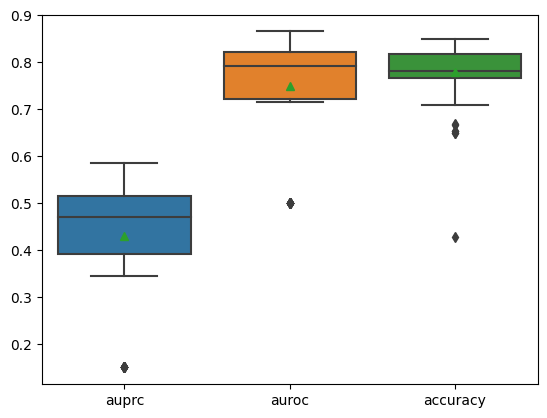

In [25]:
#COlocando informações graficamente
import matplotlib.pyplot as plt
import seaborn

sns.boxplot(
    data=base_results_gs,
    showmeans=True
);

#### Treinando novamente o Pipeline com os novos parametros

In [26]:
pipeline_logreg_best =  Pipeline(
    [
        ('preprocessing',preprocessing),
        ('feature_selection',SelectKBest(score_func=f_classif,k=grid_search.best_params_['feature_selection__k'])),
        ('rus',RandomUnderSampler(random_state=RANDOM_STATE)),
        ('model',LogisticRegression(
            random_state=RANDOM_STATE,
            C=grid_search.best_params_['model__C'],
            penalty=grid_search.best_params_['model__penalty'],
            solver=grid_search.best_params_['model__solver']
        ))
    ]
)
scores= cross_validate(
        pipeline_logreg_best,
        X,
        y,
        cv=skf,
        scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'average_precision']
    
)

In [27]:
pipeline_logreg_best

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Income', 'Age']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status',
                                                   'Age_Group', 'Kidhome',
                                                   'Teenhome', 'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5',
                                                   'Accepted_Cmp_Total',
                                                   'Has_Accepted_Cmp',
                                                   'Complain',
                                                   'Years_Since_Enrolled',...
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'Mnt_Total', 'Mnt_Reg',
                                                   'Num_Total_Purchases']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Days_Since_Enrolled',
                                                   'Recency'])])),
                ('feature_selection', SelectKBest(k=25)),
                ('rus', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=10.0, random_state=42,
                                    solver='liblinear'))])

In [28]:
# Adicionando o tempo 
scores['time']=scores['fit_time']+ scores['score_time']

In [29]:
#Criando um dataframe apartir do dicionario
base_score_best=pd.DataFrame(scores)
base_score_best

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time
0,0.068508,0.026006,0.759637,0.353383,0.701493,0.831651,0.571204,0.094514
1,0.068506,0.027002,0.775510,0.370968,0.686567,0.831671,0.568596,0.095507
2,0.068509,0.026999,0.782313,0.384000,0.716418,0.840191,0.524194,0.095508
3,0.070511,0.026000,0.804989,0.419355,0.787879,0.895131,0.671534,0.096511
4,0.067514,0.027001,0.750567,0.355263,0.818182,0.853879,0.566483,0.094516


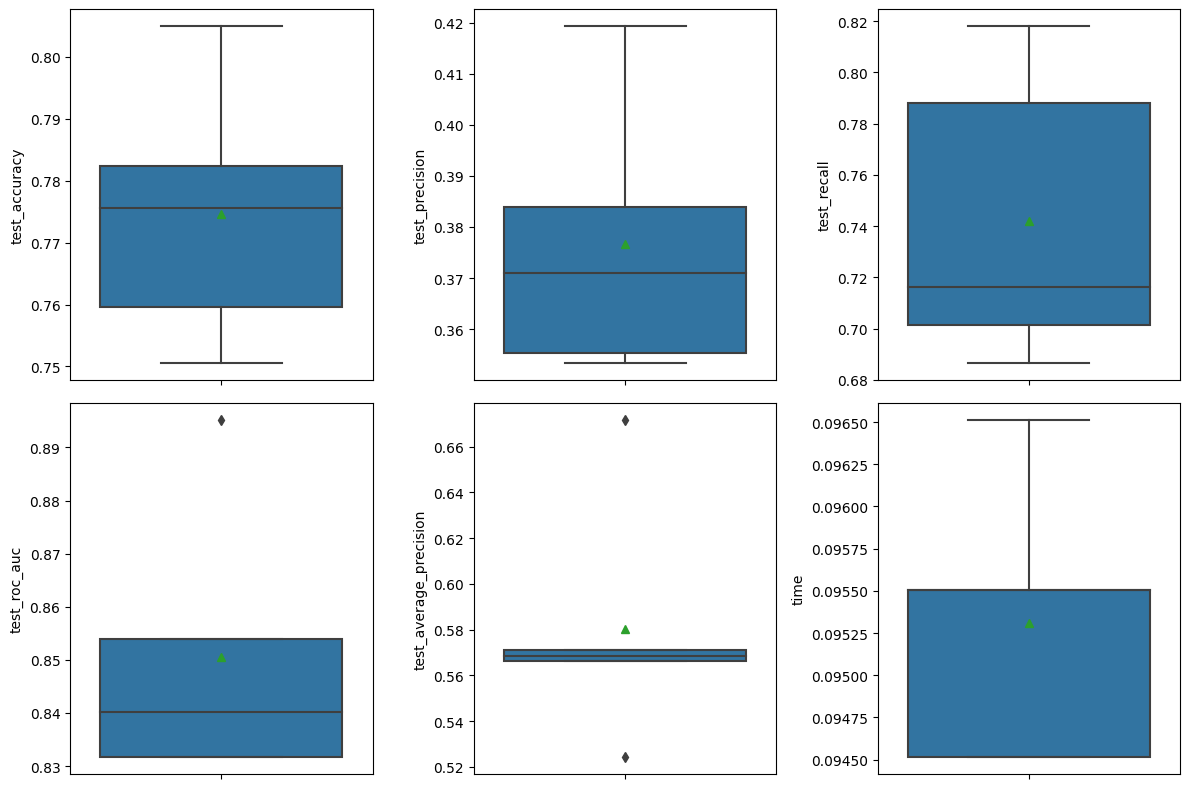

In [30]:
#Coloando o 'base_score_best' em forma gráfica
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), tight_layout=True)

cols = base_score_best.columns[2:].to_list()

for ax, col in zip(axs.flatten(), cols):
    b = sns.boxplot(y=col, data=base_score_best, ax=ax, showmeans=True)
    b.set_xticklabels(b.get_xticklabels(), fontsize=7)

plt.show()

In [31]:
#Olhando fit
pipeline_logreg_best.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Income', 'Age']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status',
                                                   'Age_Group', 'Kidhome',
                                                   'Teenhome', 'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5',
                                                   'Accepted_Cmp_Total',
                                                   'Has_Accepted_Cmp',
                                                   'Complain',
                                                   'Years_Since_Enrolled',...
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'Mnt_Total', 'Mnt_Reg',
                                                   'Num_Total_Purchases']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Days_Since_Enrolled',
                                                   'Recency'])])),
                ('feature_selection', SelectKBest(k=25)),
                ('rus', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=10.0, random_state=42,
                                    solver='liblinear'))])

In [32]:
#Verificar a importancia de cada coluna
names=pipeline_logreg_best[:-1].get_feature_names_out()
names

array(['onehot__AcceptedCmp1_0', 'onehot__AcceptedCmp1_1',
       'onehot__AcceptedCmp3_0', 'onehot__AcceptedCmp3_1',
       'onehot__AcceptedCmp4_0', 'onehot__AcceptedCmp4_1',
       'onehot__AcceptedCmp5_0', 'onehot__AcceptedCmp5_1',
       'onehot__Accepted_Cmp_Total_0', 'onehot__Accepted_Cmp_Total_1',
       'onehot__Accepted_Cmp_Total_2', 'onehot__Accepted_Cmp_Total_3',
       'onehot__Has_Accepted_Cmp_0', 'onehot__Has_Accepted_Cmp_1',
       'onehot__Children_0', 'onehot__Has_Children_0',
       'onehot__Has_Children_1', 'onehot__Cluster_0', 'power__MntWines',
       'power__MntMeatProducts', 'power__NumCatalogPurchases',
       'power__Mnt_Total', 'power__Mnt_Reg',
       'minmax__Days_Since_Enrolled', 'minmax__Recency'], dtype=object)

In [33]:
#Verificar a importancia de cada coluna
importance=pipeline_logreg_best['model'].coef_[0]
importance

array([-0.1601319 ,  0.58196178, -0.46594065,  0.88777053,  0.17604569,
        0.24578419, -0.14481383,  0.5666437 , -0.80733668, -1.86580335,
       -0.98261246, -0.52200396, -0.80733668,  1.22916656,  0.38372803,
        0.38372803,  0.03810185, -0.75675511, -0.44092876,  1.33110152,
        0.35340232,  0.63878971, -1.47770581,  3.76148746, -3.02266538])

In [34]:
#Verificar a importancia de cada coluna
base_importance=pd.DataFrame(
{
    'name': names,
    'importance': importance
}
)
base_importance.sort_values(by='importance')

,name,importance
24,minmax__Recency,-3.022665
9,onehot__Accepted_Cmp_Total_1,-1.865803
22,power__Mnt_Reg,-1.477706
10,onehot__Accepted_Cmp_Total_2,-0.982612
8,onehot__Accepted_Cmp_Total_0,-0.807337
12,onehot__Has_Accepted_Cmp_0,-0.807337
17,onehot__Cluster_0,-0.756755
11,onehot__Accepted_Cmp_Total_3,-0.522004
2,onehot__AcceptedCmp3_0,-0.465941
18,power__MntWines,-0.440929


- importance negativo, maiores fatores para responder negativamente a campanha de marketing
- importence positivo, maiores fatores para responder positivamente a campanha de marketing

### Finalizando vendo as 2 metricas gráficas utilizadas no notebook mais a acima.

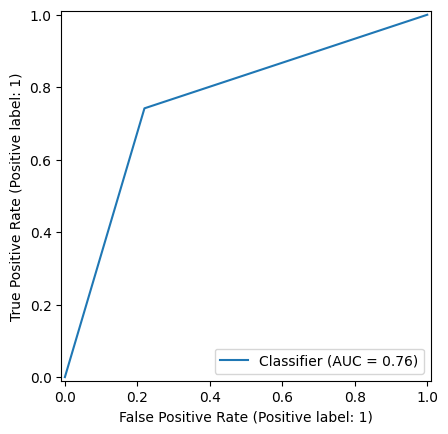

In [35]:
#ROC
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(pipeline_logreg_best,X,y,cv=skf)
roc=RocCurveDisplay.from_predictions(y,y_pred)

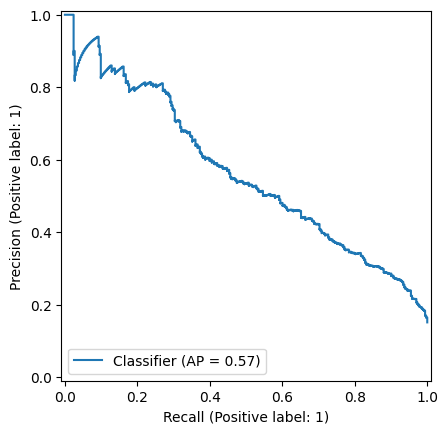

In [36]:
#Precision-Recall
from sklearn.metrics import PrecisionRecallDisplay
y_pred = cross_val_predict(pipeline_logreg_best,X,y,cv=skf,method='decision_function')
prc=PrecisionRecallDisplay.from_predictions(y,y_pred)